### Industry Project
# Neural Networks for Leakage Detection in Vacuum Bagging

The objective is to develop a function fθ that relies on parameters to forecast the coordinates of a leakage, denoted as y, within the range of -1 to 1 on both the x and y axes. The input to this function is the normalized flow rates, represented as x, which satisfy the condition that the sum of its four components is equal to 1 and each component is non-negative.






In [ ]:
# importing necessary packages

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
import os
from keras.utils import CustomObjectScope
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

In [ ]:
# reading leakage datset_100 for training
train_100 = pd.read_csv("/content/drive/MyDrive/FPDS/Final project/leakage_dataset_train_100.csv")
train_100.head()

In [ ]:
# reading leakage datset_1000 for training

train_1000 = pd.read_csv("/content/drive/MyDrive/FPDS/Final project/leakage_dataset_train_1000.csv")
train_1000.head()

In [ ]:
# reading validation dataset

train_v = pd.read_csv("/content/drive/MyDrive/FPDS/Final project/leakage_dataset_validation_1000.csv")
train_v.head()

In [ ]:
# Separating training features and target features

X_train_100 = train_100.drop(["y1", "y2"], axis = 1)
Y_train_100 = train_100[["y1", "y2"]]

X_train_1000 = train_1000.drop(["y1", "y2"], axis = 1)
Y_train_1000 = train_1000[['y1', 'y2']]

X_val = train_v.drop(["y1", "y2"], axis = 1)
Y_val = train_v[['y1', 'y2']]

In [ ]:
# neural network for training leakge_100 dataset

model_100 = Sequential()
model_100.add(Dense(64, input_dim = 4, activation ='relu'))
model_100.add(Dense(32, activation='relu'))
model_100.add(Dense(16, activation='relu'))
model_100.add(Dense(8, activation='relu'))
model_100.add(Dense(2, activation='sigmoid'))

model_100.compile(loss = 'mean_absolute_error', optimizer = Adam(0.01), metrics = ['accuracy'])

model_history_100 = model_100.fit(X_train_100, Y_train_100, epochs = 50, batch_size = 20)

In [ ]:
# neural network for training_1000 dataset

model_1000 = Sequential()
model_1000.add(Dense(64, input_dim = 4, activation ='relu'))
model_1000.add(Dense(32, activation='relu'))
model_1000.add(Dense(16, activation='relu'))
model_1000.add(Dense(8, activation='relu'))
model_1000.add(Dense(2, activation='sigmoid'))

model_1000.compile(loss = 'mean_absolute_error', optimizer = Adam(0.01), metrics = ['accuracy'])

model_history_1000 = model_1000.fit(X_train_1000, Y_train_1000, epochs = 50, batch_size = 20)

## Augmentation Part

1. for 100 dataset
2. for 1000 dataset

In [ ]:
#1. for 100 dataset

# First rotation of 90 deg...
train100_rot_90deg=train_100.assign(y1=train_100['y2'],
                       y2=train_100['y1']*-1,
                       mfc1=train_100['mfc4'],
                       mfc2=train_100['mfc1'],
                       mfc3=train_100['mfc2'],
                       mfc4=train_100['mfc3'])

# deg 180 rotate => y1=-y1, y2=-y2 wrt original
train100_rot_180deg=train_100.assign(y1=train_100['y1']*-1,
                       y2=train_100['y2']*-1,
                       mfc1=train_100['mfc3'],
                       mfc2=train_100['mfc4'],
                       mfc3=train_100['mfc1'],
                       mfc4=train_100['mfc2'])

# rotate 270deg => y1=-y2, y2=y1
train100_rot_270deg=train_100.assign(y1=train_100['y2']*-1,
                       y2=train_100['y1'],
                       mfc1=train_100['mfc2'],
                       mfc2=train_100['mfc3'],
                       mfc3=train_100['mfc4'],
                       mfc4=train_100['mfc1'])

# y flipped
train100_flip=train_100.assign(y1=train_100['y1']*-1,
                       y2=train_100['y2'],
                       mfc1=train_100['mfc2'],
                       mfc2=train_100['mfc1'],
                       mfc3=train_100['mfc4'],
                       mfc4=train_100['mfc3'])

# y90 flipped
train100_rot90_flip=train100_rot_90deg.assign(y1=train100_rot_90deg['y1']*-1,
                       y2=train100_rot_90deg['y2'],
                       mfc1=train100_rot_90deg['mfc2'],
                       mfc2=train100_rot_90deg['mfc1'],
                       mfc3=train100_rot_90deg['mfc4'],
                       mfc4=train100_rot_90deg['mfc3'])

# y180 flipped
train100_rot180_flip=train100_rot_180deg.assign(y1=train100_rot_180deg['y1']*-1,
                       y2=train100_rot_180deg['y2'],
                       mfc1=train100_rot_180deg['mfc2'],
                       mfc2=train100_rot_180deg['mfc1'],
                       mfc3=train100_rot_180deg['mfc4'],
                       mfc4=train100_rot_180deg['mfc3'])

#y270 flipped
train100_rot270_flip=train100_rot_270deg.assign(y1=train100_rot_270deg['y1']*-1,
                       y2=train100_rot_270deg['y2'],
                       mfc1=train100_rot_270deg['mfc2'],
                       mfc2=train100_rot_270deg['mfc1'],
                       mfc3=train100_rot_270deg['mfc4'],
                       mfc4=train100_rot_270deg['mfc3'])

training_aug_100=pd.concat([train_100,train100_rot_90deg,train100_rot_180deg,train100_rot_270deg,train100_flip,train100_rot90_flip,train100_rot180_flip,train100_rot270_flip],axis=0)

X_Train_aug_100 = training_aug_100.drop(['y1','y2'],axis=1)
Y_Train_aug_100 = training_aug_100[['y1', 'y2']]

model_hist_aug_100=model_100.fit(X_Train_aug_100,Y_Train_aug_100,epochs =50,batch_size=20, verbose=1)


In [ ]:
#2. for 1000 dataset

# First rotation of 90 deg...
train1000_rot_90deg=train_1000.assign(y1=train_1000['y2'],
                       y2=train_1000['y1']*-1,
                       mfc1=train_1000['mfc4'],
                       mfc2=train_1000['mfc1'],
                       mfc3=train_1000['mfc2'],
                       mfc4=train_1000['mfc3'])

# deg 180 rotate => y1=-y1, y2=-y2 wrt original
train1000_rot_180deg=train_1000.assign(y1=train_1000['y1']*-1,
                       y2=train_1000['y2']*-1,
                       mfc1=train_1000['mfc3'],
                       mfc2=train_1000['mfc4'],
                       mfc3=train_1000['mfc1'],
                       mfc4=train_1000['mfc2'])

# rotate 270deg => y1=-y2, y2=y1
train1000_rot_270deg=train_1000.assign(y1=train_1000['y2']*-1,
                       y2=train_1000['y1'],
                       mfc1=train_1000['mfc2'],
                       mfc2=train_1000['mfc3'],
                       mfc3=train_1000['mfc4'],
                       mfc4=train_1000['mfc1'])

# y flipped
train1000_flip=train_1000.assign(y1=train_1000['y1']*-1,
                       y2=train_1000['y2'],
                       mfc1=train_1000['mfc2'],
                       mfc2=train_1000['mfc1'],
                       mfc3=train_1000['mfc4'],
                       mfc4=train_1000['mfc3'])

# y90 flipped
train1000_rot90_flip=train1000_rot_90deg.assign(y1=train1000_rot_90deg['y1']*-1,
                       y2=train1000_rot_90deg['y2'],
                       mfc1=train1000_rot_90deg['mfc2'],
                       mfc2=train1000_rot_90deg['mfc1'],
                       mfc3=train1000_rot_90deg['mfc4'],
                       mfc4=train1000_rot_90deg['mfc3'])

# y180 flipped
train1000_rot180_flip=train1000_rot_180deg.assign(y1=train1000_rot_180deg['y1']*-1,
                       y2=train1000_rot_180deg['y2'],
                       mfc1=train1000_rot_180deg['mfc2'],
                       mfc2=train1000_rot_180deg['mfc1'],
                       mfc3=train1000_rot_180deg['mfc4'],
                       mfc4=train1000_rot_180deg['mfc3'])

# y270 flipped
train1000_rot270_flip=train1000_rot_270deg.assign(y1=train1000_rot_270deg['y1']*-1,
                       y2=train1000_rot_270deg['y2'],
                       mfc1=train1000_rot_270deg['mfc2'],
                       mfc2=train1000_rot_270deg['mfc1'],
                       mfc3=train1000_rot_270deg['mfc4'],
                       mfc4=train1000_rot_270deg['mfc3'])

training_aug_1000=pd.concat([train_1000,train1000_rot_90deg,train1000_rot_180deg,train1000_rot_270deg,train1000_flip,train1000_rot90_flip,train1000_rot180_flip,train1000_rot270_flip],axis=0)

X_Train_aug_1000 = training_aug_1000.drop(['y1','y2'],axis=1)
Y_Train_aug_1000 = training_aug_1000[['y1', 'y2']]

model_hist_aug_1000=model_1000.fit(X_Train_aug_1000,Y_Train_aug_1000,epochs =50,batch_size=20, verbose=1)

## Equivariant Model


In [ ]:
# The task requires building a personalized model utilizing the Keras Subclassing API to train an equivariant neural network on the original dataset.

class EquivariantHiddenLayer(keras.layers.Layer):
  def __init__(self,name =None,**kwargs):
    super(EquivariantHiddenLayer, self).__init__(**kwargs)
    
  def build(self, input_shape):
    initializer = tf.keras.initializers.RandomNormal(stddev=0.2)
    self.a = self.add_weight(name='w1',shape = (), initializer = initializer, trainable = True)
    self.b = self.add_weight(name='w2',shape = (), initializer = initializer, trainable = True)
    self.c = self.add_weight(name='w3',shape = (), initializer = initializer, trainable = True)

  def call(self, inputs):
    W1 = [[self.a, self.b, self.c, self.b],
          [self.b, self.a, self.b, self.c],
          [self.c, self.b, self.a, self.b],
          [self.b, self.c, self.b, self.a]]
    return tf.matmul(inputs, W1)
	
 
class EquivariantOutputLayer(keras.layers.Layer):
  def __init__(self, **kwargs):
    super(EquivariantOutputLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    initializer = tf.keras.initializers.RandomNormal(stddev=0.2)
    self.d = self.add_weight(name = "o1", shape = (), initializer = initializer, trainable = True)
        
  def call(self, inputs):
    first_term = self.d * tf.reduce_sum(inputs * [1, -1, -1, 1], axis=1, keepdims=True)
    second_term = self.d * tf.reduce_sum(inputs * [-1, -1, 1, 1], axis=1, keepdims=True)
    return tf.concat([first_term, second_term], axis=1)
  

In [ ]:
# Training leakage_100_dataset on equivariant model

model_equivariant_100 = tf.keras.Sequential()
model_equivariant_100.add(EquivariantHiddenLayer())
model_equivariant_100.add(EquivariantOutputLayer())

model_equivariant_100.compile(optimizer = Adam(0.01), loss='mean_absolute_error', metrics = ["accuracy"])

model_equivariant_100.fit(X_train_100, Y_train_100, batch_size=20, epochs=50)

In [ ]:
# saving and loading

if os.path.exists('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100.h5'):
    os.remove('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100.h5')

model_equivariant_100.save('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100.h5')

new_model_equivariant_100 = keras.models.load_model('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100.h5', 
                                                    custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [ ]:
# Evaluating validation dataset on model and calculating Mean Absolute Error

Y_pred_equivariant_100 = new_model_equivariant_100.predict(X_val)

mae_equivariant_100 = mean_absolute_error(Y_val, Y_pred_equivariant_100)

# Print the result
print(f'Mean Absolute Error: {mae_equivariant_100:.4f}')

In [ ]:
# Training leakage_1000_dataset on equivariant model

model_equivariant_1000 = tf.keras.Sequential()
model_equivariant_1000.add(EquivariantHiddenLayer())
model_equivariant_1000.add(EquivariantOutputLayer())

model_equivariant_1000.compile(optimizer=Adam(0.01), loss='mean_absolute_error', metrics = ["accuracy"])

model_equivariant_1000.fit(X_train_1000, Y_train_1000, batch_size=20, epochs=50)

In [ ]:
# Saving and loading the model

if os.path.exists('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000.h5'):
    os.remove('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000.h5')

model_equivariant_1000.save('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000.h5')

new_model_equivariant_1000 = keras.models.load_model('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000.h5', 
                                                    custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [ ]:
# Evaluating validation dataset on model and calculating Mean Absolute Error

Y_pred_equivariant_1000 = new_model_equivariant_1000.predict(X_val)

mae_equivariant_1000 = mean_absolute_error(Y_val, Y_pred_equivariant_1000)

# Print the result
print(f'Mean Absolute Error: {mae_equivariant_1000:.4f}')

In [ ]:
# Training leakage_100_augmented_dataset on equivariant model

model_equivariant_aug_100 = tf.keras.Sequential()
model_equivariant_aug_100.add(EquivariantHiddenLayer())
model_equivariant_aug_100.add(EquivariantOutputLayer())

model_equivariant_aug_100.compile(optimizer=Adam(0.01), loss='mean_absolute_error', metrics = ["accuracy"])

model_equivariant_aug_100.fit(X_Train_aug_100, Y_Train_aug_100, batch_size=20, epochs=50)

In [ ]:
# saving and loading

if os.path.exists('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100_augmented.h5'):
    os.remove('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100_augmented.h5')

model_equivariant_aug_100.save('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100_augmented.h5')

new_model_equivariant_100_augmented = keras.models.load_model('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_100_augmented.h5', 
                                                    custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [ ]:
# Evaluating validation dataset on model and calculating Mean Absolute Error

Y_pred_equivariant_100_augmented = new_model_equivariant_100_augmented.predict(X_val)

mae_equivariant_100_augmented = mean_absolute_error(Y_val, Y_pred_equivariant_100_augmented)

# Print the result
print(f'Mean Absolute Error: {mae_equivariant_100_augmented:.4f}')

In [ ]:
# Training leakage_1000_augmented_dataset on equivariant model

model_equivariant_aug_1000 = tf.keras.Sequential()
model_equivariant_aug_1000.add(EquivariantHiddenLayer())
model_equivariant_aug_1000.add(EquivariantOutputLayer())
model_equivariant_aug_1000.compile(optimizer=Adam(0.01), loss='mean_absolute_error', metrics = ["accuracy"])

model_equivariant_aug_1000.fit(X_Train_aug_1000, Y_Train_aug_1000, batch_size=20, epochs=50)

In [ ]:
# Saving and loading the model

if os.path.exists('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000_augmented.h5'):
    os.remove('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000_augmented.h5')

model_equivariant_aug_1000.save('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000_augmented.h5')

new_model_equivariant_1000_augmented = keras.models.load_model('/content/drive/MyDrive/FPDS/Final project/model/model_equivariant_1000_augmented.h5', 
                                                    custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [ ]:
# # Evaluating validation dataset on model and calculating Mean Absolute Error

Y_pred_equivariant_1000_augmented = new_model_equivariant_1000_augmented.predict(X_val)

mae_equivariant_1000_augmented = mean_absolute_error(Y_val, Y_pred_equivariant_1000_augmented)

# Print the result
print(f'Mean Absolute Error: {mae_equivariant_1000_augmented:.4f}')

## Hyperparameter Tuning

In [ ]:
# tuning on standard model_100

def build_model(hp):
    model_100 = Sequential()
    model_100.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_100.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_100.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model_100.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_100

tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_100'
)

tuner.search(X_train_100, Y_train_100, epochs=100)

best_model_standard_100 = tuner.get_best_models(num_models=1)[0]
best_model_standard_100.save("/content/drive/MyDrive/FPDS/Final project/model/model_standard_100.h5")

new_model_standard_100 = load_model("/content/drive/MyDrive/FPDS/Final project/model/model_standard_100.h5")


In [ ]:
Y_pred_standard_100 = new_model_standard_100.predict(X_val)

mae_standard_100 = mean_absolute_error(Y_val, Y_pred_standard_100)

# Print the result
print(f'Mean Absolute Error: {mae_standard_100:.4f}')

In [ ]:
# tuning on standard model_1000

def build_model_1000(hp):
    model_1000 = Sequential()
    model_1000.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_1000.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model_1000.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_1000

tuner = RandomSearch(
    build_model_1000,
    objective='accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_1000'
)

tuner.search(X_train_1000, Y_train_1000, epochs=100)

best_model_standard_1000 = tuner.get_best_models(num_models=1)[0]
best_model_standard_1000.save("/content/drive/MyDrive/FPDS/Final project/model/model_standard_1000.h5")
new_model_standard_1000 = load_model("/content/drive/MyDrive/FPDS/Final project/model/model_standard_1000.h5")

In [ ]:
Y_pred_standard_1000 = new_model_standard_1000.predict(X_val)

mae_standard_1000 = mean_absolute_error(Y_val, Y_pred_standard_1000)

# Print the result
print(f'Mean Absolute Error: {mae_standard_1000:.4f}')

In [ ]:
# tuning on model_augmented_100

def build_model(hp):
    model_100 = Sequential()
    model_100.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_100.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_100.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model_100.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_100

tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_100_augmented'
)

tuner.search(X_Train_aug_100, Y_Train_aug_100, epochs=100)

best_model_standard_100_augmented = tuner.get_best_models(num_models=1)[0]
best_model_standard_100_augmented.save("/content/drive/MyDrive/FPDS/Final project/model/model_standard_100_augmented.h5")

new_model_standard_100_augmented = load_model("/content/drive/MyDrive/FPDS/Final project/model/model_standard_100_augmented.h5")

In [ ]:
Y_pred_standard_100_augmented = new_model_standard_100_augmented.predict(X_val)

mae_standard_100_augmented = mean_absolute_error(Y_val, Y_pred_standard_100_augmented)

# Print the result
print(f'Mean Absolute Error: {mae_standard_100_augmented:.4f}')

In [ ]:
# tuning on model_augmented_1000

def build_model_1000(hp):
    model_1000 = Sequential()
    model_1000.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_1000.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model_1000.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_1000

tuner = RandomSearch(
    build_model_1000,
    objective='accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_1000_augmented'
)

tuner.search(X_Train_aug_1000, Y_Train_aug_1000, epochs=100)

best_model_standard_1000_augmented = tuner.get_best_models(num_models=1)[0]
best_model_standard_1000_augmented.save("/content/drive/MyDrive/FPDS/Final project/model/model_standard_1000_augmented.h5")

new_model_standard_1000_augmented = load_model("/content/drive/MyDrive/FPDS/Final project/model/model_standard_1000_augmented.h5")



In [ ]:
Y_pred_standard_1000_augmented = new_model_standard_1000_augmented.predict(X_val)


# Compute the mean absolute error
mae_standard_1000_augmented = mean_absolute_error(Y_val, Y_pred_standard_1000_augmented)

# Print the result
print(f'Mean Absolute Error: {mae_standard_1000_augmented:.4f}')


Comparing the models in terms of a visual inspection. This can, e.g.,
be accomplished by visualizing model predictions on the following sets:

• {x ∈ R^4 | x1 + x3 = 0.5, x2 = x4 = 0.25}

• {x ∈ R^4 | x2 + x4 = 0.5, x1 = x3 = 0.25}

In [ ]:
test_set_1 = pd.read_csv("/content/drive/MyDrive/FPDS/Final project/test_set_1.csv")
test_set_1.head()
y_pred_1 = model_equivariant_100.predict(test_set_1)

,X1,X2,X3,X4
0,0.20,0.25,0.30,0.25
1,0.30,0.25,0.20,0.25
2,0.40,0.25,0.10,0.25
3,0.10,0.25,0.40,0.25
4,0.25,0.25,0.25,0.25


In [ ]:
test_set_2 = pd.read_csv("/content/drive/MyDrive/FPDS/Final project/test_set_2.csv")
test_set_2.head()
y_pred_2 = model_equivariant_100.predict(test_set_2)

,X1,X2,X3,X4
0,0.25,0.20,0.25,0.30
1,0.25,0.30,0.25,0.20
2,0.25,0.40,0.25,0.10
3,0.25,0.10,0.25,0.40
4,0.25,0.25,0.25,0.25


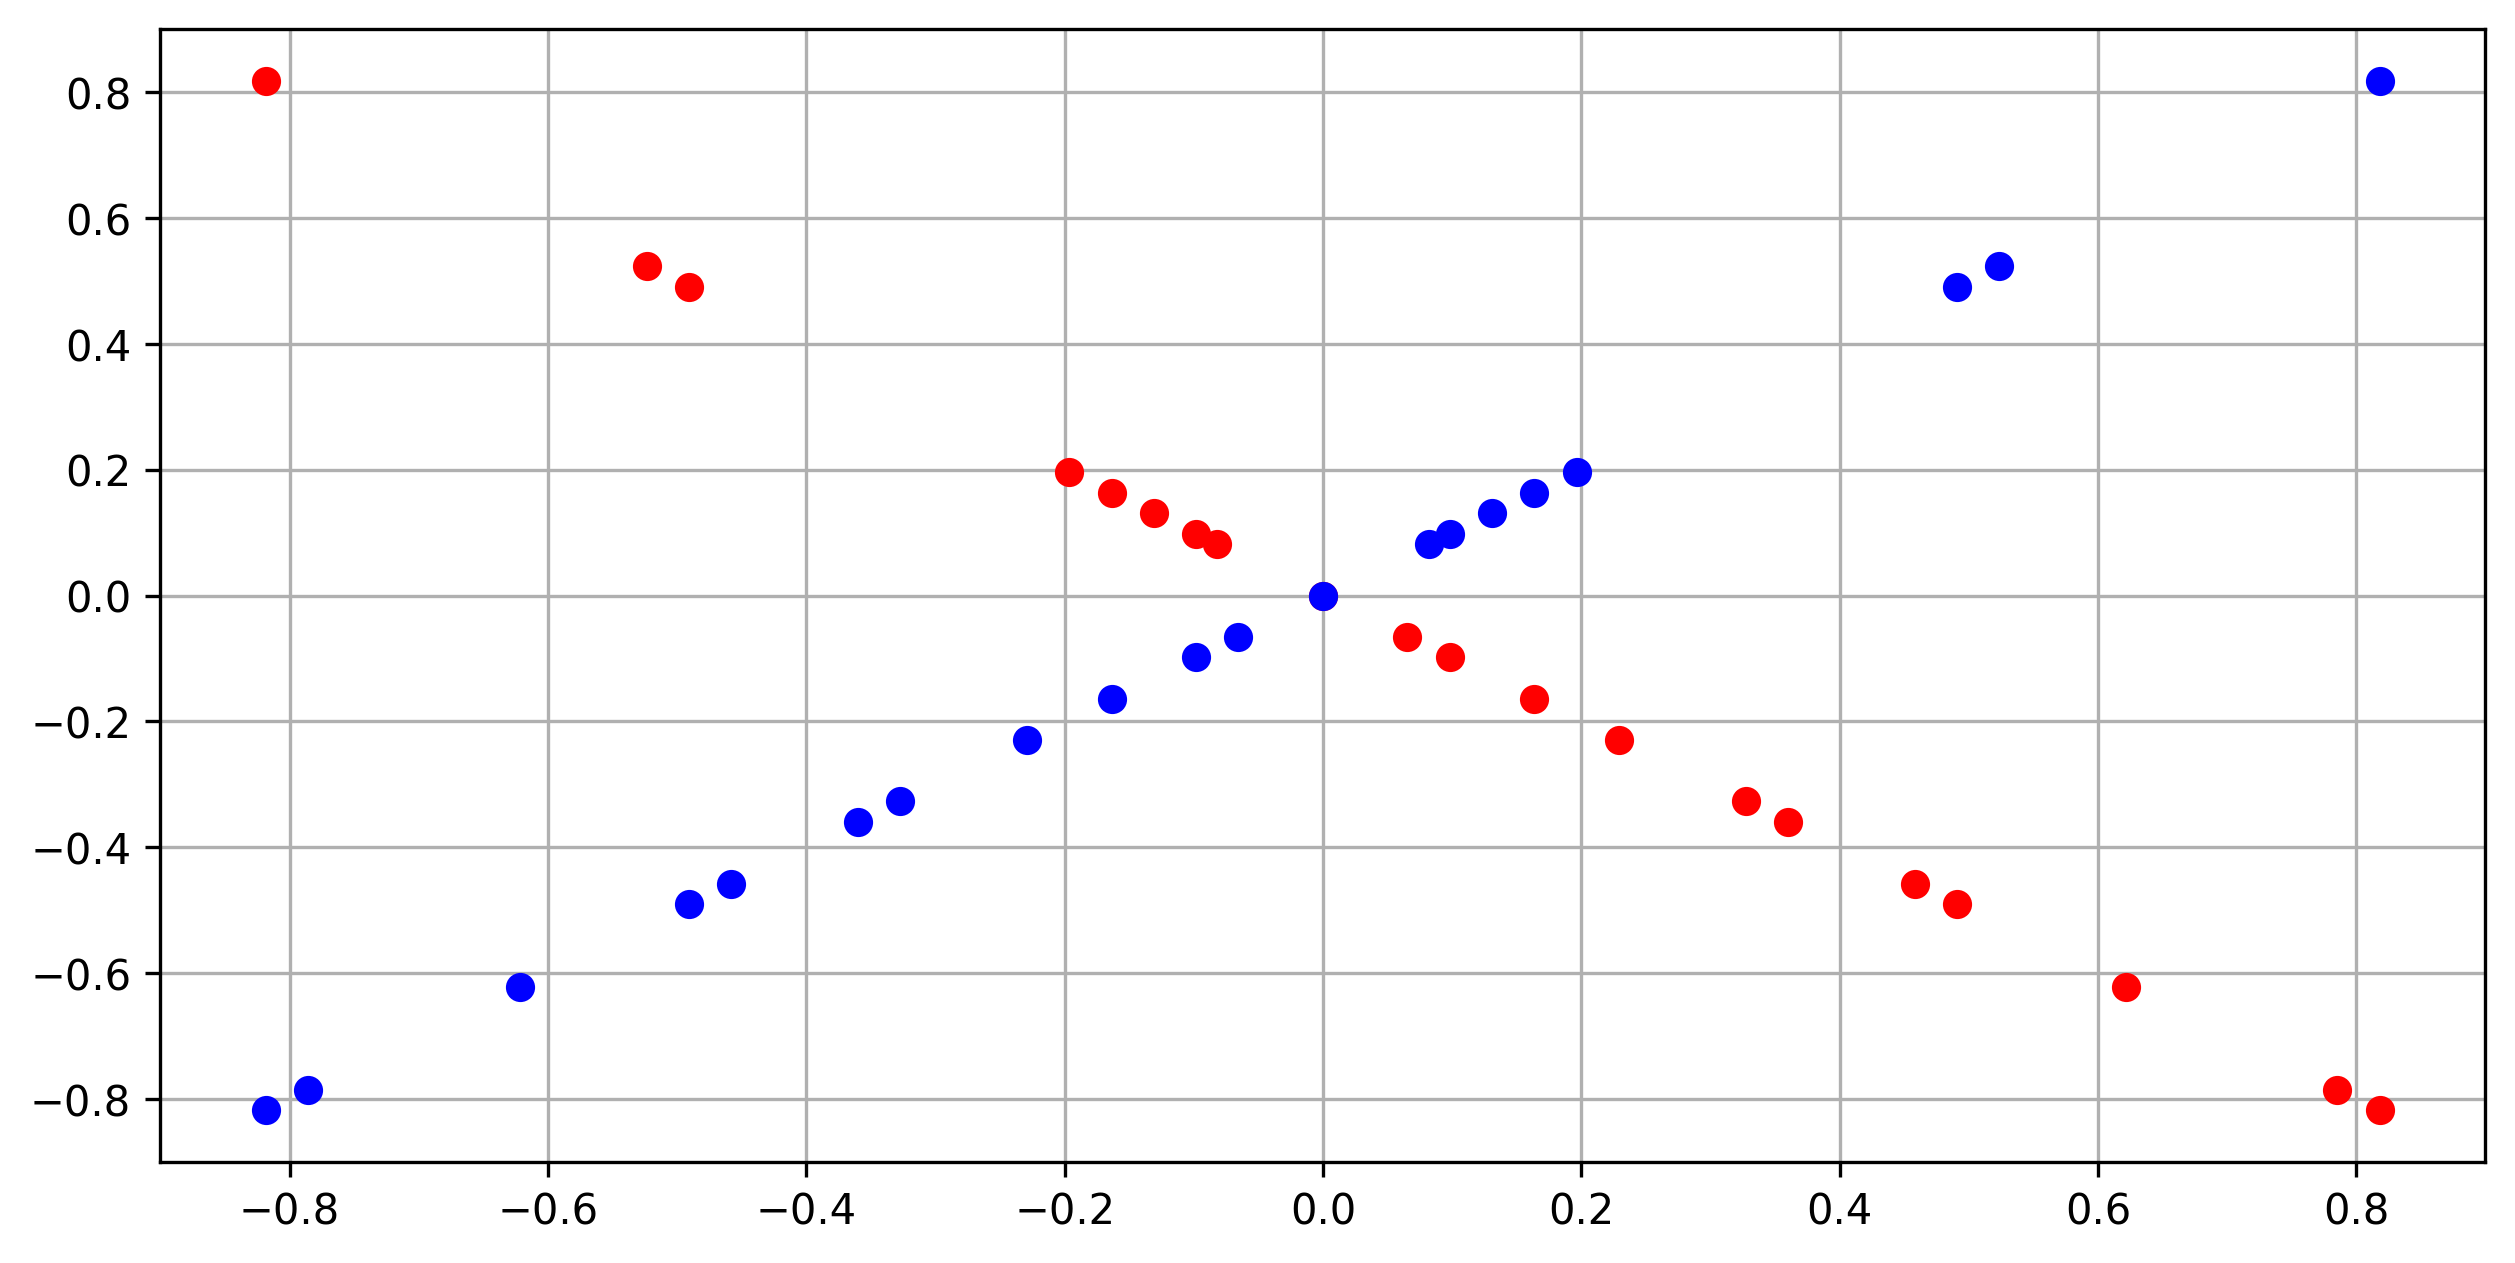

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
ax.plot(y_pred_1[0][0], y_pred_1[0][1], color="red", marker="o")
ax.plot(y_pred_1[1][0], y_pred_1[1][1], color="red", marker="o")
ax.plot(y_pred_1[2][0], y_pred_1[2][1], color="red", marker="o")
ax.plot(y_pred_1[3][0], y_pred_1[3][1], color="red", marker="o")
ax.plot(y_pred_1[4][0], y_pred_1[4][1], color="red", marker="o")
ax.plot(y_pred_1[5][0], y_pred_1[5][1], color="red", marker="o")
ax.plot(y_pred_1[6][0], y_pred_1[6][1], color="red", marker="o")
ax.plot(y_pred_1[7][0], y_pred_1[7][1], color="red", marker="o")
ax.plot(y_pred_1[8][0], y_pred_1[8][1], color="red", marker="o")
ax.plot(y_pred_1[9][0], y_pred_1[9][1], color="red", marker="o")
ax.plot(y_pred_1[10][0], y_pred_1[10][1], color="red", marker="o")
ax.plot(y_pred_1[11][0], y_pred_1[11][1], color="red", marker="o")
ax.plot(y_pred_1[12][0], y_pred_1[12][1], color="red", marker="o")
ax.plot(y_pred_1[13][0], y_pred_1[13][1], color="red", marker="o")
ax.plot(y_pred_1[14][0], y_pred_1[14][1], color="red", marker="o")
ax.plot(y_pred_1[15][0], y_pred_1[15][1], color="red", marker="o")
ax.plot(y_pred_1[16][0], y_pred_1[16][1], color="red", marker="o")
ax.plot(y_pred_1[17][0], y_pred_1[17][1], color="red", marker="o")
ax.plot(y_pred_1[18][0], y_pred_1[18][1], color="red", marker="o")
ax.plot(y_pred_1[19][0], y_pred_1[19][1], color="red", marker="o")


ax.plot(y_pred_2[0][0], y_pred_1[0][1], color="blue", marker="o")
ax.plot(y_pred_2[1][0], y_pred_1[1][1], color="blue", marker="o")
ax.plot(y_pred_2[2][0], y_pred_1[2][1], color="blue", marker="o")
ax.plot(y_pred_2[3][0], y_pred_1[3][1], color="blue", marker="o")
ax.plot(y_pred_2[4][0], y_pred_1[4][1], color="blue", marker="o")
ax.plot(y_pred_2[5][0], y_pred_1[5][1], color="blue", marker="o")
ax.plot(y_pred_2[6][0], y_pred_1[6][1], color="blue", marker="o")
ax.plot(y_pred_2[7][0], y_pred_1[7][1], color="blue", marker="o")
ax.plot(y_pred_2[8][0], y_pred_1[8][1], color="blue", marker="o")
ax.plot(y_pred_2[9][0], y_pred_1[9][1], color="blue", marker="o")
ax.plot(y_pred_2[10][0], y_pred_1[10][1], color="blue", marker="o")
ax.plot(y_pred_2[11][0], y_pred_1[11][1], color="blue", marker="o")
ax.plot(y_pred_2[12][0], y_pred_1[12][1], color="blue", marker="o")
ax.plot(y_pred_2[13][0], y_pred_1[13][1], color="blue", marker="o")
ax.plot(y_pred_2[14][0], y_pred_1[14][1], color="blue", marker="o")
ax.plot(y_pred_2[15][0], y_pred_1[15][1], color="blue", marker="o")
ax.plot(y_pred_2[16][0], y_pred_1[16][1], color="blue", marker="o")
ax.plot(y_pred_2[17][0], y_pred_1[17][1], color="blue", marker="o")
ax.plot(y_pred_2[18][0], y_pred_1[18][1], color="blue", marker="o")
ax.plot(y_pred_2[19][0], y_pred_1[19][1], color="blue", marker="o")

ax.grid(True)
plt.show()


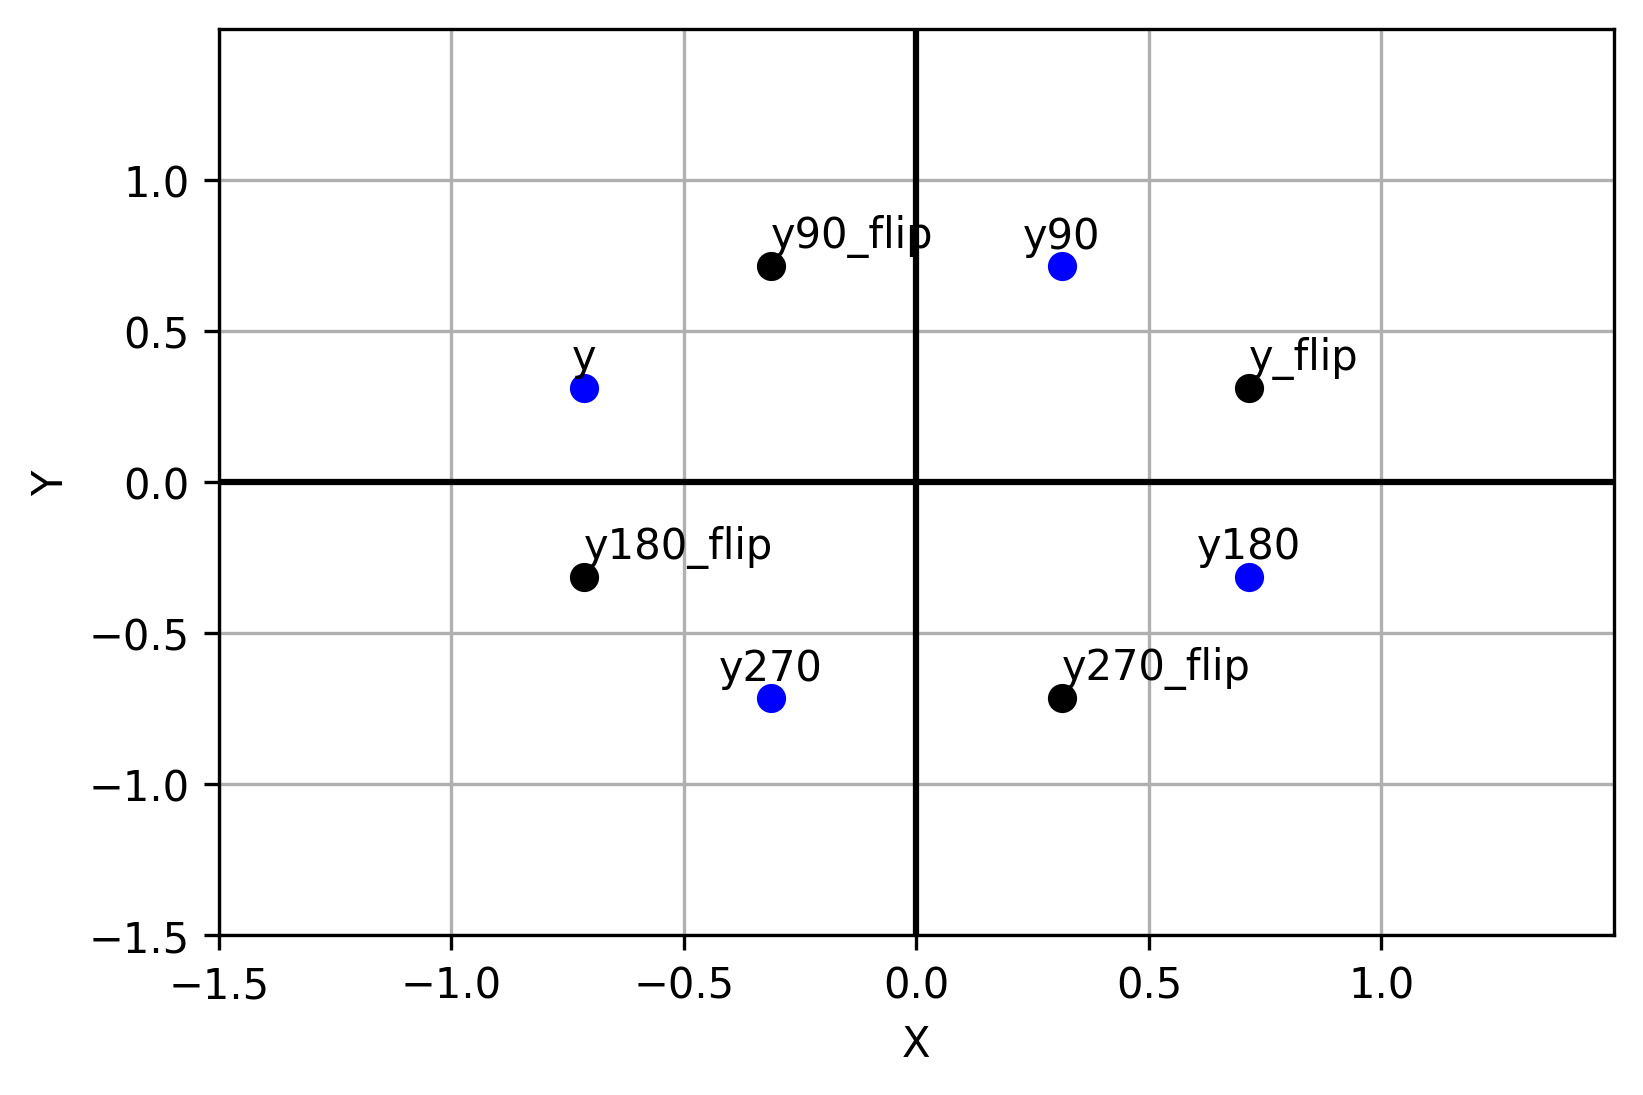

In [ ]:
x1 = train_100['y1']
x2= train_100['y2']
x1_rot90=train100_rot_90deg['y1']
x2_rot90=train100_rot_90deg['y2']
x_90=x1_rot90[0]
y_90=x2_rot90[0]
x1_rot180=train100_rot_180deg['y1']
x2_rot180=train100_rot_180deg['y2']
x_180=x1_rot180[0]
y_180=x2_rot180[0]

x1_rot270=train100_rot_270deg['y1']
x2_rot270=train100_rot_270deg['y2']
x_270=x1_rot270[0]
y_270=x2_rot270[0]

x1_fl=train100_flip['y1']
x2_fl=train100_flip['y2']

x1_flip=x1_fl[0]
y1_flip=x2_fl[0]

x=x1[0]
y=x2[0]

x1_ = train_100['y1']
x2_= train_100['y2']
x1_rot90_=train100_rot_90deg['y1']
x2_rot90_=train100_rot_90deg['y2']
x_90_=x1_rot90_[1]
y_90_=x2_rot90_[1]
x1_rot180_=train100_rot_180deg['y1']
x2_rot180_=train100_rot_180deg['y2']
x_180_=x1_rot180_[1]
y_180_=x2_rot180_[1]
x1_180_flip=train100_rot180_flip['y1']
x2_180_flip=train100_rot180_flip['y2']

x_18_flip=x1_180_flip[0]
y_18_flip=x2_180_flip[0]

x1_90_=train100_rot90_flip['y1']
x2_90_=train100_rot90_flip['y2']
x_90_flip=x1_90_[1]
y_90_flip=x2_90_[1]
x1_90_flip=x1_90_[0]
y1_90_flip=x2_90_[0]

x1_rot270_=train100_rot_270deg['y1']
x2_rot270_=train100_rot_270deg['y2']
x_270_=x1_rot270_[1]
y_270_=x2_rot270_[1]
x1_270_flip=train100_rot270_flip['y1']
x2_270_flip=train100_rot270_flip['y2']
x_27_flip = x1_270_flip[0]
y_27_flip = x2_270_flip[0]

x_=x1_[1]
y_=x2_[1]

fig, ax = plt.subplots(dpi=300)
ax.plot(x, y, color="blue", marker="o",label='y')
#ax.plot(x_90_flip,y_90_flip , color="black", marker="o",label='y')
ax.plot(x_90, y_90, color="blue", marker="o",label='y90')
ax.plot(x_270, y_270, color="blue", marker="o",label='y270')
ax.plot(x_180, y_180, color="blue", marker="o",label='y180')
ax.plot(x1_90_flip, y1_90_flip, color="black", marker="o",label='y90_flip')
ax.plot(x1_flip, y1_flip, color="black", marker="o",label='y_flip')
ax.plot(x_27_flip, y_27_flip, color="black", marker="o",label='y270_flip')
ax.plot(x_18_flip, y_18_flip, color="black", marker="o",label='y180_flip')

#ax.plot(x_, y_, color="red", marker="o",label='y')
#ax.plot(x_90_, y_90_, color="red", marker="o",label='y90')
#ax.plot(x_270_, y_270_, color="red", marker="o",label='y270')
#ax.plot(x_180_, y_180_, color="red", marker="o",label='y180')


# Set x and y labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set x and y limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Set ticks
ax.set_xticks(np.arange(-1.5, 1.5, 0.5))
ax.set_yticks(np.arange(-1.5, 1.5, 0.5))

# Add grid lines
ax.grid(True)

# Set origin
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
label_offset = 0.1
ax.text(x, y+label_offset, 'y', ha='center', va='center', color='black')
ax.text(x_90, y_90+label_offset, 'y90', ha='center', va='center', color='black')
ax.text(x_270, y_270+label_offset, 'y270', ha='center', va='center', color='black')
ax.text(x_180, y_180+label_offset, 'y180', ha='center', va='center', color='black')
#ax.text(x_, y_+label_offset, 'y', ha='center', va='center', color='black')
#ax.text(x_90_, y_90_+label_offset, 'y90', ha='center', va='center', color='black')
#ax.text(x_270_, y_270_+label_offset, 'y270', ha='center', va='center', color='black')
#ax.text(x_180_, y_180_+label_offset, 'y180', ha='right', va='center', color='black')
#ax.text(x_90_flip, y_90_flip+label_offset, 'y90_flip', ha='left', va='center', color='black')
ax.text(x1_90_flip, y1_90_flip+label_offset, 'y90_flip', ha='left', va='center', color='black')
ax.text(x_27_flip, y_27_flip+label_offset, 'y270_flip', ha='left', va='center', color='black')
ax.text(x_18_flip, y_18_flip+label_offset, 'y180_flip', ha='left', va='center', color='black')
ax.text(x1_flip, y1_flip+label_offset, 'y_flip', ha='left', va='center', color='black')
plt.show()
